In [3]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [4]:
import torch
from torch import nn
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
from pathlib import Path

In [5]:
transform = transforms.Compose([transforms.ToTensor(),
                                #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                transforms.Normalize((0.5), (0.5))
                               ])

# Download and load the training data
trainset = datasets.FashionMNIST('MNIST_data/', download = True, train = True, transform = transform)
testset = datasets.FashionMNIST('MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

In [6]:
# Examine a sample
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


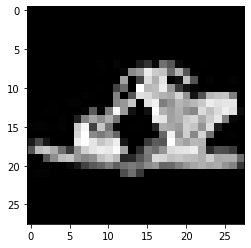

In [7]:
plt.imshow(images[1].numpy().squeeze(), cmap = 'Greys_r')

In [8]:
images[1].numpy().squeeze().shape

(28, 28)

In [9]:
import random

In [10]:
portion_size = (10,10)

In [11]:
x1 = random.randint(0, images[1].shape[1]-portion_size[0]-1)
y1 = random.randint(0, images[1].shape[2]-portion_size[1]-1)

#x2, y2 = x1+portion_size[0]-1, y1+portion_size[1]-1
x2, y2 = x1+portion_size[0], y1+portion_size[1]

In [12]:
np.random.randint(0,10)

4

In [13]:
part_im = images[1].numpy().squeeze()[x1:x2,y1:y2]

In [14]:
part_im

array([[-0.99215686, -1.        , -1.        , -1.        , -0.9607843 ,
        -0.42745095, -0.9607843 , -0.17647058,  0.8901961 ,  0.0196079 ],
       [-1.        , -0.9843137 , -1.        , -0.78039217, -0.12941176,
         0.10588241, -0.05098039,  0.15294123, -0.21568626, -1.        ],
       [-0.99215686, -0.9764706 , -1.        ,  0.38823533,  0.85882354,
        -0.5921569 ,  0.33333337, -0.23137254, -0.92941177, -1.        ],
       [-1.        , -1.        , -1.        ,  0.48235297,  1.        ,
        -0.08235294, -0.19999999, -0.05098039, -0.3490196 , -1.        ],
       [-1.        , -1.        , -1.        ,  0.70980394,  0.9764706 ,
         0.6392157 ,  0.32549024,  0.47450984,  0.7176471 , -0.8509804 ],
       [ 0.13725495, -0.27843136, -0.654902  ,  0.01176476,  0.41960788,
         0.6392157 ,  0.7176471 ,  0.6627451 ,  0.92156863,  0.07450986],
       [-0.05882353,  0.2313726 ,  0.30980396,  0.01176476, -0.11372548,
        -0.03529412,  0.30196083,  0.4431373 

In [15]:
x1,x2,y1,y2

(13, 23, 3, 13)

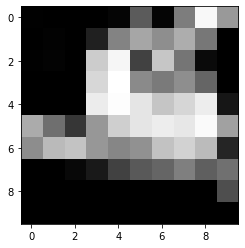

In [16]:
plt.imshow(part_im, cmap = 'Greys_r')

In [17]:
part_im = part_im.flatten()

In [18]:
part_im[:95].shape

(95,)

In [19]:
#make dataloader that can sample part of images.

In [20]:
#make custum gaussian mixture NLL loss function.

In [21]:
fashion_imgs = torch.load('MNIST_data/FashionMNIST/processed/test.pt')

In [22]:
class FashionNeihgborhoodData(Dataset):

    def __init__(self, image_dir, transform=None, nbh_size=(4,9)):#csv_file,root,
        #self.root = root
        self.image_dir = image_dir
        #self.image_files = os.listdir(image_dir)
        #self.data = pd.read_csv(csv_file).iloc[:, 1]
        self.fashion_data = torch.load(image_dir)
        self.fashion_imgs = self.fashion_data[0]/255
        self.fashion_labels = self.fashion_data[1]
        self.transform = transform
        self.nbh_size = nbh_size

    def __len__(self):
        return self.fashion_labels.shape[0]

    def __getitem__(self, index):
        #image_name = os.path.join(self.image_dir, self.image_files[index])  
        #image = PIL.Image.open(image_name)
        image = self.fashion_imgs[index]
        #label = self.data[index]
        if self.transform:
            image = self.transform(image)
        
        nbh_im = torch.empty((0,32)) 
        for i in range(10):
            x1 = np.random.randint(0, images[1].shape[1]-self.nbh_size[0]-1)
            y1 = np.random.randint(0, images[1].shape[2]-self.nbh_size[1]-1)
        
            x2, y2 = x1+portion_size[0], y1+portion_size[1]
            nbh = torch.flatten(image[x1:x2,y1:y2])
            nbh = nbh[:32]
            nbh_im = torch.cat((nbh_im, nbh.unsqueeze(0)), dim = 0)
        
        return nbh_im#image #, label)

In [23]:
class GaussMixNLLLoss():
    def __init__(self):
        tntn
def GaussianMixNLLLoss(input: Tensor,
    target: Tensor,
    var: Tensor,
    full: bool = False,
    eps: float = 1e-6,
    reduction: str = "mean",
) -> Tensor:
    
    if torch.any(var < 0):
        raise ValueError("var has negative entry/entries")
        
    # Clamp for stability
    var = var.clone()
    with torch.no_grad():
        var.clamp_(min=eps)
    
    loss = 0.5 * (torch.log(var) + (input - target)**2 / var)
    
    if reduction == 'mean':
        return loss.mean()
    elif reduction == 'sum':
        return loss.sum()
    else:
        return loss
    
def GaussianMixNLLLoss(pi_s, mu, var, target):
    GaussianNLLLoss = torch.nn.GaussianNLLLoss()
    total_likelihood = 0

    # Calculate and sum the likelihoods of each component
    for k, pi_k in enumerate(pi_s):
        loss = GaussianNLLLoss(mu[k], target, var[k])
        likelihood = torch.exp(-loss)
        total_likelihood += pi_k * likelihood

    # Take the negative log to give the GMM negative log-likelihood loss
    GMM_NLLLoss = -torch.log(total_likelihood) 


NameError: name 'Tensor' is not defined

In [24]:
fashion = FashionNeihgborhoodData(image_dir='MNIST_data/FashionMNIST/processed/test.pt')#, transform=transforms.ToTensor())
#fashion[2]

In [25]:
class MLP(nn.Module):#define neighborhood size
    '''
    Multilayer Perceptron.
    '''
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(31, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 64),
        nn.ReLU(),
        nn.Linear(64, 2),#,
        #nn.ReLU()
        #nn.Sigmoid()
        
        )


    def forward(self, x):
        '''Forward pass'''
        out = self.layers(x)
        
        mu = torch.reshape(out[:,0],(out.shape[0],1))
        sig = torch.reshape(torch.exp(out[:,1]),(out.shape[0],1))

        out = torch.cat((mu,sig),dim=1)
        #print(out)
        return out

In [26]:
#fashion[7].shape
#mlp(fashion[7][:,:-1])

In [27]:
dataloader = DataLoader(fashion, batch_size=2,
                        shuffle=True)#, num_workers=0)

In [28]:
mlp = MLP()

# Define the loss function and optimizer
loss_function = nn.GaussianNLLLoss(full=False, reduction='mean')
optimizer = torch.optim.SGD(mlp.parameters(), lr=1e-4)
#trainloader = torch.utils.data.DataLoader(train_dat, batch_size=32, shuffle=True)

In [1]:
epochs = 20 #20
loss_vals = []

In [ ]:
for e in range(epochs): # 5 epochs at maximum
    
    # Print epoch
    print(f'Starting epoch {e+1}')
    
    # Set current loss value
    current_loss = 0.0
    
    for i, data in enumerate(dataloader, 0):
      
      # Get and prepare inputs
        data = torch.reshape(data,(-1,32))
        inputs, targets = data[:,:-1], data[:,-1]
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))
      
      # Zero the gradients
        optimizer.zero_grad()
      
      # Perform forward pass
        outputs = mlp(inputs)
        mu_s = outputs[:,0]
        sigma_s = outputs[:,1]  #sigma2 
        #sigma_s = torch.exp(outputs[:,1])
        #print(outputs.shape)
      
      # Compute loss
        #loss = loss_function(outputs, targets)
        loss = loss_function(mu_s, targets, sigma_s)
      
      # Perform backward pass
        loss.backward()
      
      # Perform optimization
        optimizer.step()
      
      # Print statistics
        current_loss += loss.item()
        
        #if i % 500 == 0:
        if i % 20 == 0:
            print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
            current_loss = 0.0

  # Process is complete.
    loss_vals.append(current_loss)
    print('Training process has finished.')

In [ ]:
#!conda install pytorch torchvision torchaudio -c pytorch


In [ ]:
next(iter(dataloader)).shape

In [ ]:
for batch_idx, data in enumerate(dataloader, 0):
    #print(batch_idx)
    #print(torch.reshape(data,(-1,32)).shape)
    data = torch.reshape(data,(-1,32))
    inputs, targets = data[:,:-1], data[:,-1]
    #inputs, targets = inputs.float(), targets.float()
    #print(targets.shape)
    targets = targets.reshape((targets.shape[0], 1))
    #print(targets.shape)
    
    #print(data[:,:,])
    inp = inputs
    print(inputs.dtype)
    break
    #outputs = mlp(inputs)
    #mu_s = outputs[:,0]
    #sigma_s = outputs[:,1] 
    

In [ ]:
mmmm[1].shape[0]

In [ ]:
len(fashion)

In [ ]:
inp = inp-0.05

In [ ]:
mlp(inp)